# Tests d'adéquation et d'indépendance

## Table des matières

* [Introduction](#Introduction)
* [Tests d'adéquation](#Tests-d'adéquation)
* [Test d'indépendance](#Test-d'indépendance)
* [Démonstration avec python](#Démonstration-avec-python)
* [Tests d'adéquation et d'indépendance avec R](Tests%20d'adéquation%20et%20d'indépendance%20avec%20R.ipynb)

## Introduction

À la séance précédente, nous avons vu comment tester l'équivalence entre les moyennes ou les variances de deux populations à partir d'échantillons de celles-ci. Pour pouvoir réaliser ces tests, les populations doivent suivre des lois normales et les populations doivent être indépendantes. Si ces hypothèses n'étaient pas vérifiées, on ne pouvait pas les appliquer.

Dans cette séance, nous allons voir comment tester, à partir d'un échantillon, qu'une population suit une loi de probabilité donnée. Nous verrons également que l'on peut tester l'indépendance entre deux variables aléatoires.

[Retour en haut](#Table-des-matières)

## Tests d'adéquation

Considérons un échantillon aléatoire $(X_1, \dots, X_n)$ dont on ne connait pas la loi parente. L'objectif est de chercher, parmi les lois usuelles, celle qui «ressemble le plus» à la distribution de notre échantillon.

Pour quantifier la notion de ressemblance, nous allons calculer la **fonction de répartition** (f.r.) **empirique** $F_n$ de l'échantillon et la comparer à la f.r. théorique $F$ de la loi retenue. Notre hypothèse nulle sera que l'échantillon suit la loi retenue. Plus précisément, on dira que l'échantillon suit la loi théorique si la distance entre les deux f.r. est inférieure à un seuil $C$. Comme le choix de ce seuil semble arbitraire et difficile à définir, nous allons plutôt fixer la probabilité que la distance soit plus grande que le seuil (erreur de première espèce $\alpha$). On a donc,
$$
\alpha = P\left\{ d(F, F_n) > C~\vert~H_0\text{ est vraie} \right\}.  
$$
La valeur de $C$ correspondante est appelée **seuil d'acceptation** ou **seuil critique**.

<span style="color:red"> La différence entre les différents tests réside dans le choix de la distance $d$. </span>

### Test de Kolmogorov-Smirnov

Le test de Kolmogorov-Smirnov est non paramètrique. La distance retenue est
$$
 d(F_n, F) = \sup_{x\in \mathbb{R}} \vert F_n(x) - F(x) \vert
$$
que l'on comparera au seuil critique $K_n$ tabulé spécialement pour ce test dans [la table de Kolmogorov-Smirnov](https://moodle.umons.ac.be/pluginfile.php/335048/mod_folder/content/0/Table%20Kolmogorov.pdf?forcedownload=1). La valeur $K_n$ est donnée en fonction de $n$ et de l'erreur de première espèce $\alpha$.

L'échantillon suit la loi retenue si $d(F_n, F) < K_n$.

En pratique, pour calculer cette distance, on considère l'échantillon ordonné c'est à dire
$$
x_{(1)} < x_{(2)} < \dots < x_{(n)}.   
$$
La fonction de répartition empirique $F_n$ est alors simplement
$$
F_n(x) \equiv P_n\left\{X \in ]-\infty, x] \right\} = \sum_{x_{(i)} \leq x} \dfrac{1}{n}
$$

### Test du $\chi^2$

Ces test est également non-paramètrique. Considérons un échantillon de taille $n$ et notons, pour l'échantillon, $N_i$ le nombre d'observations $x_i$ ou appartenant à un intervalle $I_i$.

Si on note $p_i$, la probabilité théorique de faire l'observation $x_i$ ou d'appartenir à l'intervalle $I_i$. Nous pouvons comparer $N_i$ à l'effectif théorique $n \cdot p_i$.

La distance retenue est,
$$
d(F_n, F) = \sum_{i=1}^{k} \dfrac{(N_i - n p_i)^2}{n p_i}
$$
où $k$ est le nombre d'intervalles ou de valeurs.
Dans la limite où $n\rightarrow +\infty$, $N_i\sim\mathcal{N}(n p_i, n p_i (1-p_i))$ et donc $d \sim \chi^2_{k-1}$. Le **seuil critique** </span> $C$ est, dans ce cas, le **fractile d'ordre $1-\alpha$ de la loi du khi-deux à $k-1$ d.d.l**. En pratique, on approximera $d \sim \chi^2_{k-1}$ si $n p_i > 5$. Si ce n'est pas le cas, on regroupera des valeurs (ou intervalles) contiguës.

Il est souvent plus facile de calculer la distance à l'aide de la formule développée

$$
 d(F_n, F) = \left( \sum_{i=1}^{k} \dfrac{N_i^2}{n p_i} \right) - n.
$$

L'échantillon suit la loi retenue si $d(F_n, F) < \chi^2_{k-1; 1-\alpha}$.

<span style="color:red"> Si la loi retenue dépend de paramètres que l'on doit estimer, il faudra utiliser $\chi^2_{k-1-r; 1-\alpha}$ où $r$ est le nombre de paramètres à estimer. </span>

### Remarques

Nous avons vu deux tests pour vérifier l'adéquation de la distribution de notre échantillon à une loi de probabilité donnée. On peut donc se demander lequel choisir. Il n'y a pas une règle universelle et les deux tests peuvent être utilisés dans toutes les situations puisqu'il n'y a pas de restriction sur la loi théorique retenue. Cependant, pour appliquer le test du $\chi^2$ pour une loi continue, il faut considérer différents intervalles alors que le test de Kolmogorov-Smirnov ne s'appuie que sur la fonction de partition.
1. Si la loi retenue est discrète, on peut facilement appliquer le test du $\chi^2$ car les valeurs $N_i$ sont asscociées aux différentes valeurs $x_i$ que peut prendre la variable aléatoire.
2. Appliquer le test du $\chi^2$ à un échantillon quelconque lorsque l'on retient une loi continue, impose de construire $k$ intervalles. Le choix de $k$ étant arbitraire, il est plus simple d'appliquer le test de Kolmogorov-Smirnov car la fonction de répartition de la loi est connue.

On peut toutefois réaliser plusieurs tests de $\chi^2$ avec différentes valeurs de $k$ pour vérifier que ce choix arbitraire n'influence pas le résultat.

Les deux tests peuvent également être utilisés de manière complémentaire.

[Retour en haut](#Table-des-matières)

## Test d'indépendance

Nous allons maintenant voir comment tester l'indépendance entre deux variables aléatoires.

### Test du $\chi^2$

On considère deux variables qualitatives d'une population et on souhaite déterminer s'il existe un lien entre elles (ex: la couleur des yeux et la couleur des cheveux).

**L'hypothèse nulle** est que les deux variables $A$ et $B$ **sont indépendantes**. On peut construire un tableau à double entrée qui reprend le nombre de personnes dans chaque catégorie. Par exemple :

Cheveux \ Yeux | Bleus | Marrons
---------------|-------|--------
**Blonds**     | 26    | 14
**Bruns**      | 24    | 36


On peut alors comparer les observations $O_{ij}$ (ex: nombre de personnes avec des yeux bleus et des cheveux bruns) aux nombres attendus $E_{ij}$ où $i$ indice les valeurs de $A$ et $j$ celles de $B$. Pour calculer les nombres attendus $E_{ij}$, on utilise le fait que si $A$ et $B$ sont indépendants,
$$
P(A \cap B) = P(A) \cdot P(B).
$$
On a donc
$$
E_{ij} = n \cdot \dfrac{n_i \cdot n_j}{n^2} = \dfrac{n_i \cdot n_j}{n}.
$$

On considère

$$
D = \sum_{i=1}^{k_A} \sum_{j=1}^{k_B} \dfrac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$
où $k_A$ et $k_B$ représentent respectivement le nombre de valeurs que prennent $A$ et $B$. Lorsque la taille $n$ de notre échantillon tend vers l'infini, $D$ tend vers une loi du $\chi^2$ à $(k_A - 1) \cdot (k_B - 1)$ d.d.l. On va donc rejeter l'indépendance des deux variables si $D$ est plus grand que le fractile d'ordre $1-\alpha$ de la loi du $\chi^2$ à $(k_A - 1) \cdot (k_B - 1)$ d.d.l.

[Retour en haut](#Table-des-matières)

## Démonstration avec python

Dans cette section, nous allons voir comment réaliser ces différents tests à l'aide de python.

### Test de Kolmogorov-Smirnov.

Considérons un échantillon aléatoire de loi parente (normalement inconnue) exponentielle. On va tester si cet échantillon suit bien une loi exponentielle.

Comme la loi retenue est continue, le test de KS est moins arbitraire. La loi exponentielle telle que [définie dans numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential) dépend d'un paramètre d'échelle $\beta$. Ce paramètre devra être estimé mais il correspond à la moyenne, on utilisera donc la moyenne empirique comme estimateur. Le test de KS peut se faire via [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html). Il faut spécifier:
* `rvs` : l'échantillon dont on dispose.
* `cdf` : la loi de probabilité théorique, sous forme d'une chaîne de caractères et doit correspondre à une des distributions reprises [ici](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions).
* `args` : un tuple qui reprend les valeurs des paramètres de la loi théorique. **Attention, les distributions dans scipy et numpy ne sont pas toujours définies de la même manière**.

Dans notre cas,
```python
scipy.stats.kstest(sample, cdf="expon", args=(0, scale_estimate))
```
car dans scipy, la distribution exponentielle se nomme `expon` et dépend de deux paramètres (contrairement à celle de numpy), `loc` et `scale`. Pour nous, `loc=0` et `scale` est l'estimateur de $\beta$.

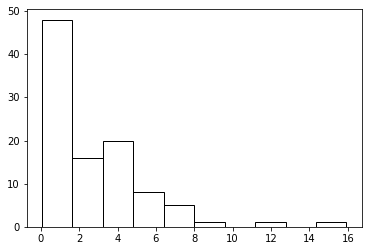

La statistique de test vaut 0.067 et la p-valeur 0.739.


In [1]:
import scipy.stats as sp_st
import numpy as np
import matplotlib.pyplot as plt

seed = 42
rg = np.random.default_rng(seed)

sample = rg.exponential(scale=3, size=100)
plt.hist(sample, color="k", fill=False)
plt.show()

scale_estimate = np.mean(sample)

stat, pval = sp_st.kstest(sample, cdf="expon", args=(0, scale_estimate))
print("La statistique de test vaut %.3f et la p-valeur %.3f."% (stat, pval))

Avec cet exemple, on accepte l'hypothèse nulle si on considère une erreur de première espèce de 5% car dans ce cas, $K_n = 0.134$. De manière équivalente, on voit que la p-valeur est supérieure à 5%.

### Test d'adéquation du $\chi^2$

Ce test n'est pas disponible dans `scipy`. Cependant, il peut être facilement implémenté pour une distribution théorique particulière.

### Test d'indépendance du $\chi^2$

Les test d'indépendance du $\chi^2$ peut se faire avec [`scipy.stats.chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). Il faut spécifier `observed`, qui correspond au tableau à double entrée des variables $A$ et $B$. Cette fonction retourne :
* la statistique de test;
* la p-valeur associée à cette statistique;
* le nombre de degrés de liberté de la loi du $\chi^2$;
* le tableau des fréquences théoriques.

Par défaut, si le nombre de d.d.l. est égale à 1, `scipy.stats.chi2_contingency` effectue une [correction](https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity) pour le calcul de la statistique. Cependant, cette correction n'est pas nécessaire si $E_{ij}>5~\forall i, j$ et on devra alors spécifier l'argument `correction` pour mettre sa valeur à `False`.

Illustrons cela avec notre exemple des cheveux et des yeux.

In [2]:
observed = np.array([[26, 14], [24, 36]])
stat, pval, dof, expected = sp_st.chi2_contingency(observed, correction=False)
print("La valeur de la statistique est %.3f et la p-valeur vaut %.3f."% (stat, pval))
print("Le nombre de d.d.l. est %d." % dof)
print("Le tableau est théorique est\n", expected)

La valeur de la statistique est 6.000 et la p-valeur vaut 0.014.
Le nombre de d.d.l. est 1.
Le tableau est théorique est
 [[20. 20.]
 [30. 30.]]


On voit que, pour une erreur de première espèce de 5%, on doit rejeter l'hypothèse nulle car le fractile d'ordre 0.95 de la loi du khi-deux à 1 d.d.l. est 3.841. De manière équivalente, la p-valeur est inférieure à 5%.

[Retour en haut](#Table-des-matières)